In [1]:
# @title Get model coordinates
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/coron/input_files/distan_lat42.58lon-8.804p3R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
# @title Get station and sample max gust hour before
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/coron/input_files/coron.csv", usecols = ["time","gust_coron"],parse_dates=["time"]).set_index("time")


#delete duplicated
station = station[~station.index.duplicated(keep='first')]

#resample max hour before

station = station.resample("H",label="right",closed="right").max()
print("Variable statistics")
print(station.describe())

Variable statistics
         gust_coron
count  17472.000000
mean       7.565907
std        4.450470
min        0.000000
25%        3.861114
50%        6.916672
75%       10.805564
max       34.694472


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16606 entries, 2022-01-01 01:00:00 to 2023-12-30 23:00:00
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gust_coron   16606 non-null  float64
 1   dir0         16606 non-null  float64
 2   snow_prec0   16606 non-null  float64
 3   snowlevel0   16606 non-null  float64
 4   mod0         16606 non-null  float64
 5   wind_gust0   16606 non-null  float64
 6   mslp0        16606 non-null  float64
 7   temp0        16606 non-null  float64
 8   rh0          16606 non-null  float64
 9   visibility0  16606 non-null  float64
 10  lhflx0       16606 non-null  float64
 11  lwflx0       16606 non-null  float64
 12  conv_prec0   16606 non-null  float64
 13  prec0        16606 non-null  float64
 14  swflx0       16606 non-null  float64
 15  shflx0       16606 non-null  float64
 16  cape0        16606 non-null  float64
 17  cin0         16606 non-null  float64
 18  cfh0       

None

best correlation observed and meteorological model variables
gust_coron    1.000000
wind_gust0    0.813777
wind_gust1    0.810568
mod2          0.805690
mod0          0.805262
wind_gust2    0.799204
mod1          0.763024
lhflx0        0.259796
lhflx2        0.252042
cape1         0.238398
Name: gust_coron, dtype: float64


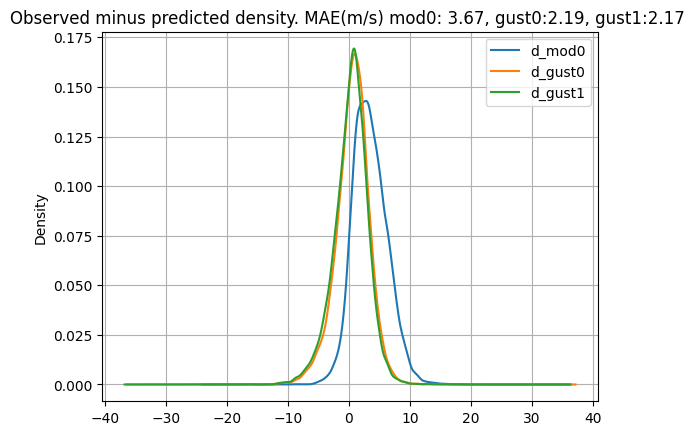

In [8]:
# @title Get meteorologic model d0 .Concatenate with station. MAE (m/s) meteorological model variables and observed variables. Select best point and variable from the meteorological model

from sklearn.metrics import mean_absolute_error

#rename columns
station = station.rename(columns={"gust_udr":"gust_o"})

#load meteorological model
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/coron/input_files/lat42.58lon-8.804p3R1KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time").drop_duplicates()

df_all = pd.concat([station,met_model],axis=1).dropna()
display(df_all.info())

# best correlation observed and meteorological model
print("best correlation observed and meteorological model variables")
print(df_all.corr()["gust_coron"].sort_values(ascending=False).head(10))

#errors (MAE) in m/s and differences
e_mod0= mean_absolute_error(df_all.gust_coron, df_all.mod0)
d_mod0 = df_all.gust_coron.values-df_all.mod0.values
e_mod1 = mean_absolute_error(df_all.gust_coron, df_all.mod1)
d_mod1 = df_all.gust_coron.values-df_all.mod1.values

e_gust0 = mean_absolute_error(df_all.gust_coron, df_all.wind_gust0)
d_gust0 = df_all.gust_coron.values-df_all.wind_gust0.values
e_gust1 = mean_absolute_error(df_all.gust_coron, df_all.wind_gust1)
d_gust1 = df_all.gust_coron.values-df_all.wind_gust1.values # lowest value
e_gust2 = mean_absolute_error(df_all.gust_coron, df_all.wind_gust2)
d_gust2 = df_all.gust_coron.values-df_all.wind_gust2.values

#Select best point and variable from the meteorological model
mae_met = round(e_gust1,2)

pd.DataFrame({"d_mod0":d_mod0,"d_mod0":d_mod0,"d_gust0":d_gust0,"d_gust1":d_gust1,
              }).plot(kind="kde", grid=True,
                      title ="Observed minus predicted density. MAE(m/s) mod0: {:0.2f}, gust0:{:0.2f}, gust1:{:0.2f} ".format(e_mod0,e_gust0,e_gust1));


machine learning number: 0
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.538219     7.531543    -0.006677
std       4.419474     3.821663     2.386660
min       0.000000     1.736807   -11.706954
25%       3.944448     4.378754    -1.303334
50%       6.777783     6.640283     0.066806
75%      10.583342    10.358619     1.412640
max      27.527800    23.105713    14.608901
machine learning number: 1
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.563907     7.527865    -0.036042
std       4.369543     3.804641     2.325951
min       0.027778     1.703751    -9.810008
25%       3.888892     4.315281    -1.380418
50%       7.055561     6.717228     0.036528
75%      10.638897    10.309453     1.340418
max      30.138913    20.810294    13.792372
machine learning number: 2
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.448865 

,MAE
count,10.000000
mean,1.798000
std,0.035528
min,1.750000
25%,1.772500
50%,1.795000
75%,1.830000
max,1.840000


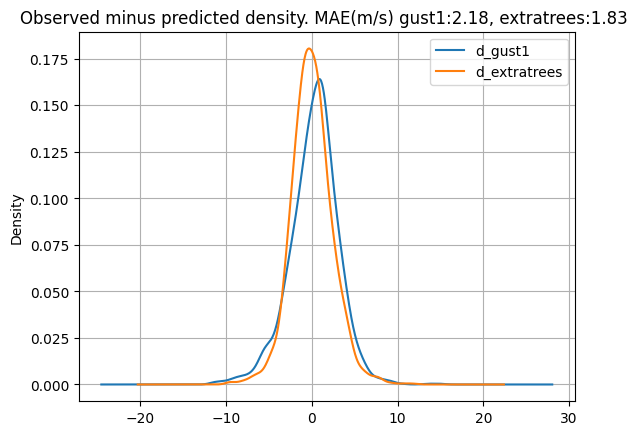

In [10]:
# @title Extratreesregressor


from sklearn.ensemble import ExtraTreesRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_coron
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = ExtraTreesRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_extratrees"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_extratrees = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results[["d_gust1","d_extratrees"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, extratrees:{:0.2f} ".format(e_gust1,e_extratrees));

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 14945, number of used features: 7
[LightGBM] [Info] Start training from score 7.617541
machine learning number: 0
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.538219     7.540452     0.002233
std       4.419474     3.862516     2.414554
min       0.000000     2.022041   -12.584549
25%       3.944448     4.218503    -1.329459
50%       6.777783     6.560911     0.039059
75%      10.583342    10.304059     1.427728
max      27.527800    21.526523    16.729494
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of dat

,MAE
count,10.00000
mean,1.79100
std,0.04557
min,1.71000
25%,1.76250
50%,1.79000
75%,1.82500
max,1.86000


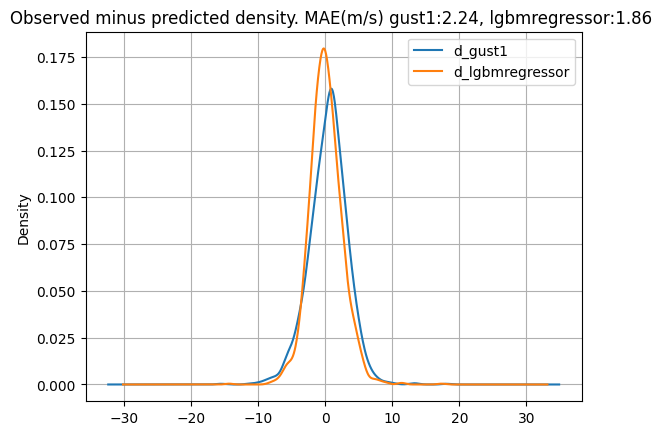

In [12]:
# @title LGBMRegressor

from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_coron
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
d_lgbmregressor = df_results['d_lgbmregressor']
df_results[["d_gust1","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor:{:0.2f} ".format(e_gust1,e_lgbm));

In [13]:
# @title Shapiro test normality MAE samples tested
from scipy.stats import shapiro

sta, p = shapiro(MAE)
print("\np value:",p)
print("significance level alpha=0.01")

alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable MAE in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable MAE no normal distribution in samples")


p value: 0.9812213778495789
significance level alpha=0.01
Accept null hypothesis: normal distribution variable MAE in the samples


In [14]:
# @title T test (1sample) compare machine learning mean absolute error in a sample (n=10) versus meteorological model mean absolute error at point 1 (wind_gust1 =2.18). The alternative hypothesis is: the sample mean absolute error of the sample is less than the given population mean absolute error (popmean). Significance level (alpha) = 0.01

from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(MAE, popmean=2.18, alternative="less")

print("MAE in test sample:",MAE)
if p_value0 < alpha:
    print("\nwe are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")
    print("\nwe are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1")
else:
    print("\nwe are accepting null hypothesis:  H0:  Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")

MAE in test sample: [1.79, 1.71, 1.84, 1.77, 1.76, 1.81, 1.79, 1.75, 1.83, 1.86]

we are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1

we are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of data points in the train set: 14945, number of used features: 10
[LightGBM] [Info] Start training from score 7.617541
machine learning number: 0
            y_test       y_pred         diff
count  1661.000000  1661.000000  1661.000000
mean      7.538219     7.560755     0.022536
std       4.419474     3.925497     2.128253
min       0.000000     1.602406   -11.281985
25%       3.944448     4.227865    -1.165040
50%       6.777783     6.750725     0.062570
75%      10.583342    10.302449     1.243811
max      27.527800    22.211467    12.428949
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of da

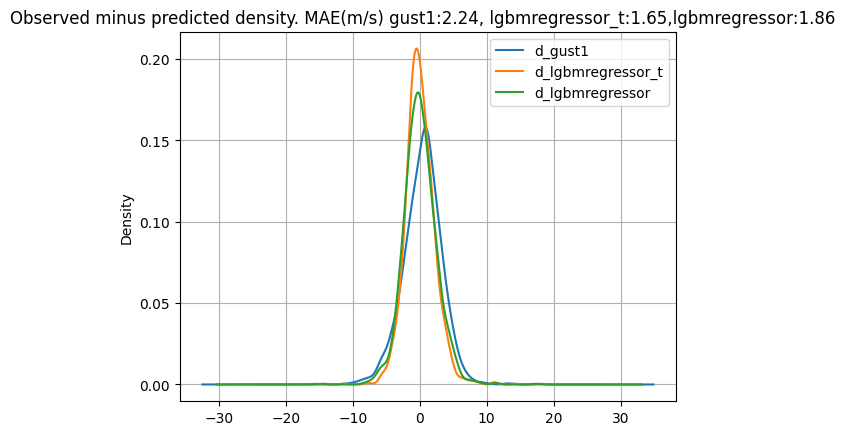

In [16]:
# @title Add time variables

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_coron
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","hour",
            "month","dayofyear","weekofyear"]]

MAE_t = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE_t.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE_t":MAE_t,});
df_r.describe()
#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor_t"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm_t = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results["d_lgbmregressor"] = d_lgbmregressor
df_results[["d_gust1","d_lgbmregressor_t","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor_t:{:0.2f},lgbmregressor:{:0.2f}  ".format(e_gust1,e_lgbm_t,e_lgbm));


In [18]:
# @title T test two related samples. This is a test for the null hypothesis that two related samples have identical mean absolute error. Alternative hypothesis the mean absolute error from the sample with time variables is less than the mean absolute error of from the sample with time variables. Significance level (alpha) = 0.01
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(MAE, MAE_t, alternative="greater")

print("\nMAE without time variables:", np.round(MAE,3))
print("\nMAE with time variables:", np.round(MAE_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:
    print("\nwe are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: MAE machine learning without time variables = MAE machine learning with time variables")

#select mae_ml
mae_ml = np.round(MAE_t,3)[-1]


MAE without time variables: [1.79 1.71 1.84 1.77 1.76 1.81 1.79 1.75 1.83 1.86]

MAE with time variables: [1.57 1.53 1.63 1.56 1.59 1.59 1.56 1.54 1.62 1.65]

alpha:  0.01

p_value point:  2.565241426359045e-11

we are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables

we are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs


In [19]:
# @title Save algorithm
import pickle
from sklearn.pipeline import Pipeline

score ={"MAE_met":mae_met,"MAE_ml":mae_ml}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/coron/algorithms/gust_coron_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMRegressor(n_estimators=200))])
